<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ADA.csv')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1822,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1823,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1824,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   ADA-USD_ADJCLOSE  1629 non-null   float64
 2   ADA-USD_CLOSE     1629 non-null   float64
 3   ADA-USD_HIGH      1629 non-null   float64
 4   ADA-USD_LOW       1629 non-null   float64
 5   ADA-USD_OPEN      1629 non-null   float64
 6   ADA-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ADA-USD_ADJCLOSE,197
ADA-USD_CLOSE,197
ADA-USD_HIGH,197
ADA-USD_LOW,197
ADA-USD_OPEN,197
ADA-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADA-USD_ADJCLOSE,1629.0,4.955610e-01,6.687141e-01,2.396100e-02,5.498100e-02,1.198830e-01,9.174660e-01,2.968239e+00
ADA-USD_CLOSE,1629.0,4.955610e-01,6.687141e-01,2.396100e-02,5.498100e-02,1.198830e-01,9.174660e-01,2.968239e+00
ADA-USD_HIGH,1629.0,5.172446e-01,6.969798e-01,2.599300e-02,5.692600e-02,1.256630e-01,9.569040e-01,3.099186e+00
ADA-USD_LOW,1629.0,4.713412e-01,6.385373e-01,1.913000e-02,5.236800e-02,1.138860e-01,8.777360e-01,2.907606e+00
ADA-USD_OPEN,1629.0,4.950231e-01,6.686581e-01,2.395400e-02,5.422400e-02,1.193970e-01,9.175090e-01,2.966390e+00
ADA-USD_VOLUME,1629.0,1.204915e+09,2.182599e+09,2.930550e+06,6.533307e+07,1.959541e+08,1.385060e+09,1.914198e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
836,2019-08-10,0.051981,0.051981,0.053137,0.047608,0.047641,6.444672e+07
1789,2022-03-20,0.877092,0.877092,0.914603,0.865669,0.901322,9.499513e+08
1760,2022-02-19,0.997703,0.997703,1.017854,0.977514,0.997005,1.104598e+09
1196,2020-08-04,0.143018,0.143018,0.147619,0.136808,0.137332,3.760960e+08
1324,2020-12-10,0.141994,0.141994,0.148530,0.139986,0.148170,7.985505e+08
1437,2021-04-02,1.196509,1.196509,1.245915,1.187607,1.189208,2.909026e+09
1720,2022-01-10,1.128052,1.128052,1.178859,1.080153,1.173786,1.481621e+09
1805,2022-04-05,1.170801,1.170801,1.217393,1.167548,1.213029,1.188106e+09
1116,2020-05-16,0.050932,0.050932,0.051229,0.050084,0.050423,1.239135e+08
1015,2020-02-05,0.059231,0.059231,0.059851,0.055675,0.055985,1.381499e+08


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,18716200.0,21.505011,40.206349
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6766780.0,18.806006,26.074639
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5532220.0,1.990010,15.476554
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7280250.0,14.609836,23.730689
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4419440.0,5.595160,11.938711


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

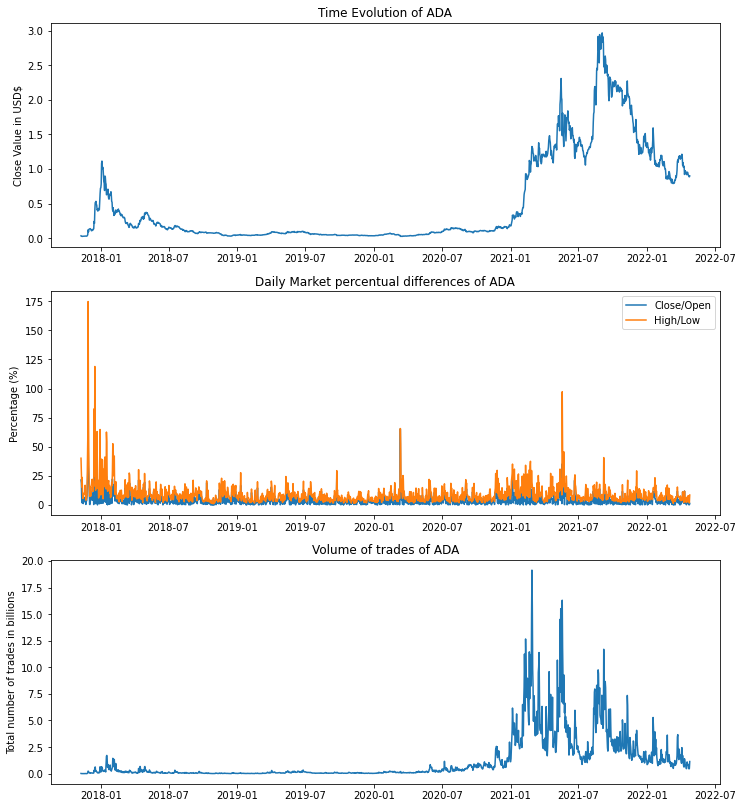

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1453,2021-11-01,1.950002,1.950002,2.015316,1.917960,1.964962,2.649339e+09,0.767181,5.076016
1454,2021-11-02,1.971377,1.971377,1.996540,1.934827,1.949818,2.459980e+09,1.093601,3.189587
1455,2021-11-03,2.063701,2.063701,2.144626,1.950845,1.971404,4.722706e+09,4.472400,9.933178
1456,2021-11-04,1.984882,1.984882,2.100966,1.956403,2.064559,3.301214e+09,4.014193,7.389222
1457,2021-11-05,1.986206,1.986206,2.018975,1.963668,1.984745,2.274852e+09,0.073559,2.816516
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08,2.943303,8.087861
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08,0.350655,3.329853
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08,2.102638,2.933783
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08,0.217639,1.814127


# BUILDING LSTM MODEL

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(7, df)
windowed_df['Date'] = df.iloc[7:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue,Date
0,2.021872,2.006609,1.986206,1.984882,2.063701,1.971377,1.950002,2.124419,2021-11-08
1,2.124419,2.021872,2.006609,1.986206,1.984882,2.063701,1.971377,2.273483,2021-11-09
2,2.273483,2.124419,2.021872,2.006609,1.986206,1.984882,2.063701,2.101802,2021-11-10
3,2.101802,2.273483,2.124419,2.021872,2.006609,1.986206,1.984882,2.085524,2021-11-11
4,2.085524,2.101802,2.273483,2.124419,2.021872,2.006609,1.986206,2.045766,2021-11-12
...,...,...,...,...,...,...,...,...,...
164,0.937341,0.953333,0.936730,0.917466,0.952640,0.954717,0.932412,0.910474,2022-04-21
165,0.910474,0.937341,0.953333,0.936730,0.917466,0.952640,0.954717,0.907154,2022-04-22
166,0.907154,0.910474,0.937341,0.953333,0.936730,0.917466,0.952640,0.888503,2022-04-23
167,0.888503,0.907154,0.910474,0.937341,0.953333,0.936730,0.917466,0.886350,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((169,), (169, 7, 1), (169,))

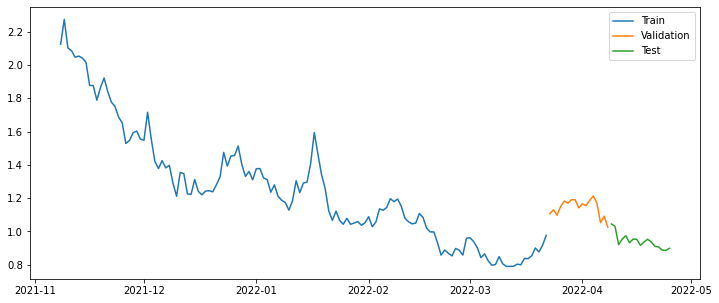

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## Get Best Parameters for LSTM

In [19]:
#!pip install tensorflow

In [20]:
import os
os.environ['PYTHONHASHSEED']= '0'
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Function to create LSTM model and compute the MSE value for the given parameters
def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate):
    
    # create model
    model = Sequential([layers.Input((7, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])
    # Compile model
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=1200, verbose=2)
    
    test_predictions = model.predict(X_test).flatten()
    
    LSTM_mse = mean_squared_error(y_test, test_predictions)
    
    return LSTM_mse

#Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
def search_parameters(dataset, batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
    best_score = float('inf')
    
    for b in batch_size:
        for e in epochs:
            for l in learn_rate:
                
                try:
                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l)
                    if mse < best_score:
                        best_score = mse
                        print('MSE=%.3f' % (mse))
                        print('Batch Size: ' + str(b))
                        print('Number of Epochs: ' + str(e))
                        print('Value of Learning Rate: ' + str(l))
                except:
                    continue
                    
    print('Best MSE=%.3f' % (best_score))
    

# define parameters
batch_size = [10, 100, 1000]
epochs = [50, 100]
learn_rate = [0.001, 0.07, 0.01, 0.1]

warnings.filterwarnings("ignore")
search_parameters(df_complete, batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/100
1/1 - 1s - loss: 2.1986 - mean_absolute_error: 1.4326 - val_loss: 1.5460 - val_mean_absolute_error: 1.2423 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 2.0414 - mean_absolute_error: 1.3792 - val_loss: 1.4397 - val_mean_absolute_error: 1.1988 - 21ms/epoch - 21ms/step
Epoch 3/100
1/1 - 0s - loss: 1.9025 - mean_absolute_error: 1.3304 - val_loss: 1.3655 - val_mean_absolute_error: 1.1674 - 20ms/epoch - 20ms/step
Epoch 4/100
1/1 - 0s - loss: 1.8003 - mean_absolute_error: 1.2935 - val_loss: 1.3160 - val_mean_absolute_error: 1.1461 - 22ms/epoch - 22ms/step
Epoch 5/100
1/1 - 0s - loss: 1.7403 - mean_absolute_error: 1.2708 - val_loss: 1.2742 - val_mean_absolute_error: 1.1277 - 21ms/epoch - 21ms/step
Epoch 6/100
1/1 - 0s - loss: 1.6788 - mean_absolute_error: 1.2480 - val_loss: 1.2373 - val_mean_absolute_error: 1.1112 - 22ms/epoch - 22ms/step
Epoch 7/100
1/1 - 0s - loss: 1.6227 - mean_absolute_error: 1.2271 - val_loss: 1.1964 - val_mean_absolute_error: 1.0926 - 21ms/epoch - 21ms/s

Epoch 58/100
1/1 - 0s - loss: 0.0420 - mean_absolute_error: 0.1431 - val_loss: 0.0125 - val_mean_absolute_error: 0.0992 - 22ms/epoch - 22ms/step
Epoch 59/100
1/1 - 0s - loss: 0.0388 - mean_absolute_error: 0.1367 - val_loss: 0.0104 - val_mean_absolute_error: 0.0903 - 23ms/epoch - 23ms/step
Epoch 60/100
1/1 - 0s - loss: 0.0351 - mean_absolute_error: 0.1296 - val_loss: 0.0084 - val_mean_absolute_error: 0.0799 - 26ms/epoch - 26ms/step
Epoch 61/100
1/1 - 0s - loss: 0.0314 - mean_absolute_error: 0.1232 - val_loss: 0.0069 - val_mean_absolute_error: 0.0692 - 23ms/epoch - 23ms/step
Epoch 62/100
1/1 - 0s - loss: 0.0281 - mean_absolute_error: 0.1182 - val_loss: 0.0059 - val_mean_absolute_error: 0.0628 - 23ms/epoch - 23ms/step
Epoch 63/100
1/1 - 0s - loss: 0.0256 - mean_absolute_error: 0.1152 - val_loss: 0.0057 - val_mean_absolute_error: 0.0609 - 24ms/epoch - 24ms/step
Epoch 64/100
1/1 - 0s - loss: 0.0239 - mean_absolute_error: 0.1152 - val_loss: 0.0063 - val_mean_absolute_error: 0.0617 - 21ms/epo

1/1 - 0s - loss: 0.3329 - mean_absolute_error: 0.4262 - val_loss: 0.0515 - val_mean_absolute_error: 0.1604 - 20ms/epoch - 20ms/step
Epoch 15/100
1/1 - 0s - loss: 0.1925 - mean_absolute_error: 0.3246 - val_loss: 0.0286 - val_mean_absolute_error: 0.1503 - 21ms/epoch - 21ms/step
Epoch 16/100
1/1 - 0s - loss: 0.0724 - mean_absolute_error: 0.2015 - val_loss: 0.1509 - val_mean_absolute_error: 0.3717 - 19ms/epoch - 19ms/step
Epoch 17/100
1/1 - 0s - loss: 0.1308 - mean_absolute_error: 0.3340 - val_loss: 0.1262 - val_mean_absolute_error: 0.3428 - 21ms/epoch - 21ms/step
Epoch 18/100
1/1 - 0s - loss: 0.0955 - mean_absolute_error: 0.2825 - val_loss: 0.0210 - val_mean_absolute_error: 0.1265 - 20ms/epoch - 20ms/step
Epoch 19/100
1/1 - 0s - loss: 0.0289 - mean_absolute_error: 0.1375 - val_loss: 0.0190 - val_mean_absolute_error: 0.1197 - 20ms/epoch - 20ms/step
Epoch 20/100
1/1 - 0s - loss: 0.0286 - mean_absolute_error: 0.1437 - val_loss: 0.0564 - val_mean_absolute_error: 0.2272 - 19ms/epoch - 19ms/ste

Epoch 71/100
1/1 - 0s - loss: 0.0070 - mean_absolute_error: 0.0622 - val_loss: 0.0072 - val_mean_absolute_error: 0.0666 - 21ms/epoch - 21ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0074 - mean_absolute_error: 0.0663 - val_loss: 0.0096 - val_mean_absolute_error: 0.0783 - 22ms/epoch - 22ms/step
Epoch 73/100
1/1 - 0s - loss: 0.0073 - mean_absolute_error: 0.0627 - val_loss: 0.0077 - val_mean_absolute_error: 0.0686 - 23ms/epoch - 23ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0070 - mean_absolute_error: 0.0630 - val_loss: 0.0075 - val_mean_absolute_error: 0.0678 - 21ms/epoch - 21ms/step
Epoch 75/100
1/1 - 0s - loss: 0.0070 - mean_absolute_error: 0.0638 - val_loss: 0.0102 - val_mean_absolute_error: 0.0810 - 22ms/epoch - 22ms/step
Epoch 76/100
1/1 - 0s - loss: 0.0075 - mean_absolute_error: 0.0634 - val_loss: 0.0072 - val_mean_absolute_error: 0.0656 - 24ms/epoch - 24ms/step
Epoch 77/100
1/1 - 0s - loss: 0.0075 - mean_absolute_error: 0.0669 - val_loss: 0.0092 - val_mean_absolute_error: 0.0759 - 22ms/epo

1/1 - 0s - loss: 0.0548 - mean_absolute_error: 0.1669 - val_loss: 0.0060 - val_mean_absolute_error: 0.0657 - 20ms/epoch - 20ms/step
Epoch 28/100
1/1 - 0s - loss: 0.0416 - mean_absolute_error: 0.1496 - val_loss: 0.0064 - val_mean_absolute_error: 0.0609 - 20ms/epoch - 20ms/step
Epoch 29/100
1/1 - 0s - loss: 0.0362 - mean_absolute_error: 0.1486 - val_loss: 0.0142 - val_mean_absolute_error: 0.0938 - 18ms/epoch - 18ms/step
Epoch 30/100
1/1 - 0s - loss: 0.0395 - mean_absolute_error: 0.1693 - val_loss: 0.0251 - val_mean_absolute_error: 0.1372 - 19ms/epoch - 19ms/step
Epoch 31/100
1/1 - 0s - loss: 0.0477 - mean_absolute_error: 0.1921 - val_loss: 0.0318 - val_mean_absolute_error: 0.1591 - 19ms/epoch - 19ms/step
Epoch 32/100
1/1 - 0s - loss: 0.0534 - mean_absolute_error: 0.2058 - val_loss: 0.0303 - val_mean_absolute_error: 0.1539 - 20ms/epoch - 20ms/step
Epoch 33/100
1/1 - 0s - loss: 0.0516 - mean_absolute_error: 0.2021 - val_loss: 0.0221 - val_mean_absolute_error: 0.1246 - 21ms/epoch - 21ms/ste

Epoch 84/100
1/1 - 0s - loss: 0.0122 - mean_absolute_error: 0.0826 - val_loss: 0.0200 - val_mean_absolute_error: 0.1163 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0822 - val_loss: 0.0187 - val_mean_absolute_error: 0.1116 - 19ms/epoch - 19ms/step
Epoch 86/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0825 - val_loss: 0.0176 - val_mean_absolute_error: 0.1070 - 19ms/epoch - 19ms/step
Epoch 87/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0833 - val_loss: 0.0168 - val_mean_absolute_error: 0.1040 - 20ms/epoch - 20ms/step
Epoch 88/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0838 - val_loss: 0.0166 - val_mean_absolute_error: 0.1034 - 19ms/epoch - 19ms/step
Epoch 89/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0838 - val_loss: 0.0169 - val_mean_absolute_error: 0.1048 - 19ms/epoch - 19ms/step
Epoch 90/100
1/1 - 0s - loss: 0.0119 - mean_absolute_error: 0.0831 - val_loss: 0.0174 - val_mean_absolute_error: 0.1073 - 19ms/epo

1/1 - 0s - loss: 0.1065 - mean_absolute_error: 0.2512 - val_loss: 0.0164 - val_mean_absolute_error: 0.1173 - 19ms/epoch - 19ms/step
Epoch 41/100
1/1 - 0s - loss: 0.1009 - mean_absolute_error: 0.2527 - val_loss: 0.0373 - val_mean_absolute_error: 0.1861 - 20ms/epoch - 20ms/step
Epoch 42/100
1/1 - 0s - loss: 0.1066 - mean_absolute_error: 0.2685 - val_loss: 0.0540 - val_mean_absolute_error: 0.2265 - 19ms/epoch - 19ms/step
Epoch 43/100
1/1 - 0s - loss: 0.1143 - mean_absolute_error: 0.2850 - val_loss: 0.0540 - val_mean_absolute_error: 0.2265 - 19ms/epoch - 19ms/step
Epoch 44/100
1/1 - 0s - loss: 0.1130 - mean_absolute_error: 0.2840 - val_loss: 0.0382 - val_mean_absolute_error: 0.1883 - 19ms/epoch - 19ms/step
Epoch 45/100
1/1 - 0s - loss: 0.1024 - mean_absolute_error: 0.2652 - val_loss: 0.0189 - val_mean_absolute_error: 0.1273 - 19ms/epoch - 19ms/step
Epoch 46/100
1/1 - 0s - loss: 0.0921 - mean_absolute_error: 0.2434 - val_loss: 0.0067 - val_mean_absolute_error: 0.0630 - 20ms/epoch - 20ms/ste

Epoch 97/100
1/1 - 0s - loss: 0.0152 - mean_absolute_error: 0.0954 - val_loss: 0.0173 - val_mean_absolute_error: 0.1151 - 21ms/epoch - 21ms/step
Epoch 98/100
1/1 - 0s - loss: 0.0150 - mean_absolute_error: 0.0958 - val_loss: 0.0155 - val_mean_absolute_error: 0.1087 - 19ms/epoch - 19ms/step
Epoch 99/100
1/1 - 0s - loss: 0.0151 - mean_absolute_error: 0.0964 - val_loss: 0.0155 - val_mean_absolute_error: 0.1089 - 20ms/epoch - 20ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0149 - mean_absolute_error: 0.0955 - val_loss: 0.0165 - val_mean_absolute_error: 0.1128 - 20ms/epoch - 20ms/step
Epoch 1/100
1/1 - 1s - loss: 1.7527 - mean_absolute_error: 1.2774 - val_loss: 1.2685 - val_mean_absolute_error: 1.1252 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 1.6573 - mean_absolute_error: 1.2410 - val_loss: 1.1999 - val_mean_absolute_error: 1.0942 - 20ms/epoch - 20ms/step
Epoch 3/100
1/1 - 0s - loss: 1.5668 - mean_absolute_error: 1.2059 - val_loss: 1.1477 - val_mean_absolute_error: 1.0701 - 20ms/epoch - 2

Epoch 54/100
1/1 - 0s - loss: 0.0178 - mean_absolute_error: 0.1002 - val_loss: 0.0069 - val_mean_absolute_error: 0.0676 - 20ms/epoch - 20ms/step
Epoch 55/100
1/1 - 0s - loss: 0.0174 - mean_absolute_error: 0.1027 - val_loss: 0.0075 - val_mean_absolute_error: 0.0699 - 19ms/epoch - 19ms/step
Epoch 56/100
1/1 - 0s - loss: 0.0178 - mean_absolute_error: 0.1067 - val_loss: 0.0084 - val_mean_absolute_error: 0.0739 - 19ms/epoch - 19ms/step
Epoch 57/100
1/1 - 0s - loss: 0.0188 - mean_absolute_error: 0.1127 - val_loss: 0.0095 - val_mean_absolute_error: 0.0793 - 20ms/epoch - 20ms/step
Epoch 58/100
1/1 - 0s - loss: 0.0200 - mean_absolute_error: 0.1185 - val_loss: 0.0104 - val_mean_absolute_error: 0.0831 - 19ms/epoch - 19ms/step
Epoch 59/100
1/1 - 0s - loss: 0.0210 - mean_absolute_error: 0.1227 - val_loss: 0.0110 - val_mean_absolute_error: 0.0852 - 19ms/epoch - 19ms/step
Epoch 60/100
1/1 - 0s - loss: 0.0215 - mean_absolute_error: 0.1250 - val_loss: 0.0110 - val_mean_absolute_error: 0.0855 - 20ms/epo

Epoch 6/100
1/1 - 0s - loss: 8.6703 - mean_absolute_error: 2.9171 - val_loss: 3.3509 - val_mean_absolute_error: 1.8299 - 21ms/epoch - 21ms/step
Epoch 7/100
1/1 - 0s - loss: 3.8060 - mean_absolute_error: 1.9277 - val_loss: 0.1883 - val_mean_absolute_error: 0.4308 - 22ms/epoch - 22ms/step
Epoch 8/100
1/1 - 0s - loss: 0.4552 - mean_absolute_error: 0.5646 - val_loss: 0.2785 - val_mean_absolute_error: 0.5251 - 21ms/epoch - 21ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2928 - mean_absolute_error: 0.4830 - val_loss: 0.5811 - val_mean_absolute_error: 0.7606 - 21ms/epoch - 21ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5294 - mean_absolute_error: 0.6617 - val_loss: 0.0305 - val_mean_absolute_error: 0.1673 - 20ms/epoch - 20ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1251 - mean_absolute_error: 0.2831 - val_loss: 0.2004 - val_mean_absolute_error: 0.4449 - 20ms/epoch - 20ms/step
Epoch 12/100
1/1 - 0s - loss: 0.4376 - mean_absolute_error: 0.5644 - val_loss: 0.0314 - val_mean_absolute_error: 0.1702 - 21ms/epoch -

Epoch 63/100
1/1 - 0s - loss: 0.0139 - mean_absolute_error: 0.0940 - val_loss: 0.0096 - val_mean_absolute_error: 0.0901 - 21ms/epoch - 21ms/step
Epoch 64/100
1/1 - 0s - loss: 0.0142 - mean_absolute_error: 0.0922 - val_loss: 0.0088 - val_mean_absolute_error: 0.0852 - 20ms/epoch - 20ms/step
Epoch 65/100
1/1 - 0s - loss: 0.0134 - mean_absolute_error: 0.0902 - val_loss: 0.0058 - val_mean_absolute_error: 0.0671 - 21ms/epoch - 21ms/step
Epoch 66/100
1/1 - 0s - loss: 0.0135 - mean_absolute_error: 0.0926 - val_loss: 0.0071 - val_mean_absolute_error: 0.0751 - 21ms/epoch - 21ms/step
Epoch 67/100
1/1 - 0s - loss: 0.0131 - mean_absolute_error: 0.0899 - val_loss: 0.0120 - val_mean_absolute_error: 0.1001 - 20ms/epoch - 20ms/step
Epoch 68/100
1/1 - 0s - loss: 0.0132 - mean_absolute_error: 0.0879 - val_loss: 0.0116 - val_mean_absolute_error: 0.0978 - 20ms/epoch - 20ms/step
Epoch 69/100
1/1 - 0s - loss: 0.0129 - mean_absolute_error: 0.0868 - val_loss: 0.0076 - val_mean_absolute_error: 0.0773 - 19ms/epo

Epoch 14/100
1/1 - 0s - loss: 0.0791 - mean_absolute_error: 0.2579 - val_loss: 0.0918 - val_mean_absolute_error: 0.2888 - 21ms/epoch - 21ms/step
Epoch 15/100
1/1 - 0s - loss: 0.1139 - mean_absolute_error: 0.3140 - val_loss: 0.0720 - val_mean_absolute_error: 0.2527 - 20ms/epoch - 20ms/step
Epoch 16/100
1/1 - 0s - loss: 0.0931 - mean_absolute_error: 0.2816 - val_loss: 0.0305 - val_mean_absolute_error: 0.1514 - 20ms/epoch - 20ms/step
Epoch 17/100
1/1 - 0s - loss: 0.0504 - mean_absolute_error: 0.2006 - val_loss: 0.0081 - val_mean_absolute_error: 0.0722 - 20ms/epoch - 20ms/step
Epoch 18/100
1/1 - 0s - loss: 0.0293 - mean_absolute_error: 0.1378 - val_loss: 0.0112 - val_mean_absolute_error: 0.0930 - 20ms/epoch - 20ms/step
Epoch 19/100
1/1 - 0s - loss: 0.0362 - mean_absolute_error: 0.1350 - val_loss: 0.0255 - val_mean_absolute_error: 0.1425 - 19ms/epoch - 19ms/step
Epoch 20/100
1/1 - 0s - loss: 0.0544 - mean_absolute_error: 0.1681 - val_loss: 0.0361 - val_mean_absolute_error: 0.1736 - 20ms/epo

Epoch 71/100
1/1 - 0s - loss: 0.0130 - mean_absolute_error: 0.0852 - val_loss: 0.0219 - val_mean_absolute_error: 0.1217 - 20ms/epoch - 20ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0130 - mean_absolute_error: 0.0849 - val_loss: 0.0204 - val_mean_absolute_error: 0.1166 - 19ms/epoch - 19ms/step
Epoch 73/100
1/1 - 0s - loss: 0.0128 - mean_absolute_error: 0.0851 - val_loss: 0.0189 - val_mean_absolute_error: 0.1106 - 20ms/epoch - 20ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0128 - mean_absolute_error: 0.0861 - val_loss: 0.0178 - val_mean_absolute_error: 0.1062 - 20ms/epoch - 20ms/step
Epoch 75/100
1/1 - 0s - loss: 0.0128 - mean_absolute_error: 0.0872 - val_loss: 0.0175 - val_mean_absolute_error: 0.1052 - 20ms/epoch - 20ms/step
Epoch 76/100
1/1 - 0s - loss: 0.0128 - mean_absolute_error: 0.0872 - val_loss: 0.0179 - val_mean_absolute_error: 0.1072 - 20ms/epoch - 20ms/step
Epoch 77/100
1/1 - 0s - loss: 0.0127 - mean_absolute_error: 0.0861 - val_loss: 0.0187 - val_mean_absolute_error: 0.1108 - 19ms/epo

Epoch 28/100
1/1 - 0s - loss: 0.1483 - mean_absolute_error: 0.3241 - val_loss: 0.0048 - val_mean_absolute_error: 0.0505 - 20ms/epoch - 20ms/step
Epoch 29/100
1/1 - 0s - loss: 0.1298 - mean_absolute_error: 0.2753 - val_loss: 0.0117 - val_mean_absolute_error: 0.0980 - 21ms/epoch - 21ms/step
Epoch 30/100
1/1 - 0s - loss: 0.1704 - mean_absolute_error: 0.3054 - val_loss: 0.0058 - val_mean_absolute_error: 0.0676 - 20ms/epoch - 20ms/step
Epoch 31/100
1/1 - 0s - loss: 0.1552 - mean_absolute_error: 0.2927 - val_loss: 0.0182 - val_mean_absolute_error: 0.1249 - 20ms/epoch - 20ms/step
Epoch 32/100
1/1 - 0s - loss: 0.1243 - mean_absolute_error: 0.2778 - val_loss: 0.0886 - val_mean_absolute_error: 0.2932 - 20ms/epoch - 20ms/step
Epoch 33/100
1/1 - 0s - loss: 0.1545 - mean_absolute_error: 0.3339 - val_loss: 0.0802 - val_mean_absolute_error: 0.2785 - 21ms/epoch - 21ms/step
Epoch 34/100
1/1 - 0s - loss: 0.1495 - mean_absolute_error: 0.3264 - val_loss: 0.0149 - val_mean_absolute_error: 0.1108 - 20ms/epo

Epoch 85/100
1/1 - 0s - loss: 0.1218 - mean_absolute_error: 0.2731 - val_loss: 0.0136 - val_mean_absolute_error: 0.1049 - 21ms/epoch - 21ms/step
Epoch 86/100
1/1 - 0s - loss: 0.1219 - mean_absolute_error: 0.2724 - val_loss: 0.0163 - val_mean_absolute_error: 0.1174 - 20ms/epoch - 20ms/step
Epoch 87/100
1/1 - 0s - loss: 0.1217 - mean_absolute_error: 0.2739 - val_loss: 0.0194 - val_mean_absolute_error: 0.1298 - 21ms/epoch - 21ms/step
Epoch 88/100
1/1 - 0s - loss: 0.1218 - mean_absolute_error: 0.2756 - val_loss: 0.0184 - val_mean_absolute_error: 0.1257 - 20ms/epoch - 20ms/step
Epoch 89/100
1/1 - 0s - loss: 0.1217 - mean_absolute_error: 0.2750 - val_loss: 0.0151 - val_mean_absolute_error: 0.1121 - 20ms/epoch - 20ms/step
Epoch 90/100
1/1 - 0s - loss: 0.1216 - mean_absolute_error: 0.2732 - val_loss: 0.0142 - val_mean_absolute_error: 0.1078 - 21ms/epoch - 21ms/step
Epoch 91/100
1/1 - 0s - loss: 0.1217 - mean_absolute_error: 0.2726 - val_loss: 0.0164 - val_mean_absolute_error: 0.1177 - 20ms/epo

Epoch 42/100
1/1 - 0s - loss: 0.0393 - mean_absolute_error: 0.1437 - val_loss: 0.0209 - val_mean_absolute_error: 0.1285 - 20ms/epoch - 20ms/step
Epoch 43/100
1/1 - 0s - loss: 0.0373 - mean_absolute_error: 0.1390 - val_loss: 0.0186 - val_mean_absolute_error: 0.1210 - 21ms/epoch - 21ms/step
Epoch 44/100
1/1 - 0s - loss: 0.0342 - mean_absolute_error: 0.1320 - val_loss: 0.0159 - val_mean_absolute_error: 0.1110 - 21ms/epoch - 21ms/step
Epoch 45/100
1/1 - 0s - loss: 0.0306 - mean_absolute_error: 0.1236 - val_loss: 0.0132 - val_mean_absolute_error: 0.1004 - 20ms/epoch - 20ms/step
Epoch 46/100
1/1 - 0s - loss: 0.0268 - mean_absolute_error: 0.1151 - val_loss: 0.0106 - val_mean_absolute_error: 0.0890 - 19ms/epoch - 19ms/step
Epoch 47/100
1/1 - 0s - loss: 0.0234 - mean_absolute_error: 0.1082 - val_loss: 0.0087 - val_mean_absolute_error: 0.0770 - 20ms/epoch - 20ms/step
Epoch 48/100
1/1 - 0s - loss: 0.0206 - mean_absolute_error: 0.1035 - val_loss: 0.0074 - val_mean_absolute_error: 0.0700 - 19ms/epo

Epoch 99/100
1/1 - 0s - loss: 0.0132 - mean_absolute_error: 0.0872 - val_loss: 0.0088 - val_mean_absolute_error: 0.0758 - 23ms/epoch - 23ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0131 - mean_absolute_error: 0.0871 - val_loss: 0.0088 - val_mean_absolute_error: 0.0758 - 25ms/epoch - 25ms/step
Epoch 1/100
1/1 - 1s - loss: 1.9391 - mean_absolute_error: 1.3438 - val_loss: 3.9786 - val_mean_absolute_error: 1.9891 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 4.0705 - mean_absolute_error: 2.0108 - val_loss: 1.1272 - val_mean_absolute_error: 1.0606 - 23ms/epoch - 23ms/step
Epoch 3/100
1/1 - 0s - loss: 1.5071 - mean_absolute_error: 1.1827 - val_loss: 0.6087 - val_mean_absolute_error: 0.7784 - 24ms/epoch - 24ms/step
Epoch 4/100
1/1 - 0s - loss: 0.4104 - mean_absolute_error: 0.5913 - val_loss: 1.0262 - val_mean_absolute_error: 1.0108 - 21ms/epoch - 21ms/step
Epoch 5/100
1/1 - 0s - loss: 1.0167 - mean_absolute_error: 0.9832 - val_loss: 7.7763 - val_mean_absolute_error: 2.7881 - 23ms/epoch - 23m

Epoch 56/100
1/1 - 0s - loss: 0.1230 - mean_absolute_error: 0.2866 - val_loss: 0.0338 - val_mean_absolute_error: 0.1769 - 23ms/epoch - 23ms/step
Epoch 57/100
1/1 - 0s - loss: 0.1199 - mean_absolute_error: 0.2801 - val_loss: 0.0197 - val_mean_absolute_error: 0.1309 - 22ms/epoch - 22ms/step
Epoch 58/100
1/1 - 0s - loss: 0.1162 - mean_absolute_error: 0.2700 - val_loss: 0.0094 - val_mean_absolute_error: 0.0829 - 22ms/epoch - 22ms/step
Epoch 59/100
1/1 - 0s - loss: 0.1169 - mean_absolute_error: 0.2647 - val_loss: 0.0054 - val_mean_absolute_error: 0.0551 - 23ms/epoch - 23ms/step
Epoch 60/100
1/1 - 0s - loss: 0.1197 - mean_absolute_error: 0.2649 - val_loss: 0.0053 - val_mean_absolute_error: 0.0545 - 24ms/epoch - 24ms/step
Epoch 61/100
1/1 - 0s - loss: 0.1197 - mean_absolute_error: 0.2649 - val_loss: 0.0086 - val_mean_absolute_error: 0.0782 - 24ms/epoch - 24ms/step
Epoch 62/100
1/1 - 0s - loss: 0.1171 - mean_absolute_error: 0.2643 - val_loss: 0.0163 - val_mean_absolute_error: 0.1172 - 22ms/epo

Epoch 13/100
1/1 - 0s - loss: 0.0317 - mean_absolute_error: 0.1502 - val_loss: 0.0652 - val_mean_absolute_error: 0.2407 - 21ms/epoch - 21ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0876 - mean_absolute_error: 0.2719 - val_loss: 0.1067 - val_mean_absolute_error: 0.3149 - 20ms/epoch - 20ms/step
Epoch 15/100
1/1 - 0s - loss: 0.1320 - mean_absolute_error: 0.3398 - val_loss: 0.0840 - val_mean_absolute_error: 0.2770 - 21ms/epoch - 21ms/step
Epoch 16/100
1/1 - 0s - loss: 0.1073 - mean_absolute_error: 0.3032 - val_loss: 0.0339 - val_mean_absolute_error: 0.1650 - 21ms/epoch - 21ms/step
Epoch 17/100
1/1 - 0s - loss: 0.0554 - mean_absolute_error: 0.2099 - val_loss: 0.0066 - val_mean_absolute_error: 0.0637 - 21ms/epoch - 21ms/step
Epoch 18/100
1/1 - 0s - loss: 0.0316 - mean_absolute_error: 0.1409 - val_loss: 0.0140 - val_mean_absolute_error: 0.1063 - 23ms/epoch - 23ms/step
Epoch 19/100
1/1 - 0s - loss: 0.0477 - mean_absolute_error: 0.1569 - val_loss: 0.0315 - val_mean_absolute_error: 0.1631 - 21ms/epo

Epoch 70/100
1/1 - 0s - loss: 0.0126 - mean_absolute_error: 0.0854 - val_loss: 0.0185 - val_mean_absolute_error: 0.1103 - 19ms/epoch - 19ms/step
Epoch 71/100
1/1 - 0s - loss: 0.0127 - mean_absolute_error: 0.0865 - val_loss: 0.0184 - val_mean_absolute_error: 0.1099 - 20ms/epoch - 20ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0127 - mean_absolute_error: 0.0865 - val_loss: 0.0191 - val_mean_absolute_error: 0.1130 - 20ms/epoch - 20ms/step
Epoch 73/100
1/1 - 0s - loss: 0.0125 - mean_absolute_error: 0.0853 - val_loss: 0.0203 - val_mean_absolute_error: 0.1177 - 20ms/epoch - 20ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0124 - mean_absolute_error: 0.0841 - val_loss: 0.0214 - val_mean_absolute_error: 0.1216 - 20ms/epoch - 20ms/step
Epoch 75/100
1/1 - 0s - loss: 0.0125 - mean_absolute_error: 0.0836 - val_loss: 0.0217 - val_mean_absolute_error: 0.1227 - 21ms/epoch - 21ms/step
Epoch 76/100
1/1 - 0s - loss: 0.0125 - mean_absolute_error: 0.0833 - val_loss: 0.0210 - val_mean_absolute_error: 0.1205 - 21ms/epo

Epoch 27/100
1/1 - 0s - loss: 0.3352 - mean_absolute_error: 0.5217 - val_loss: 0.0072 - val_mean_absolute_error: 0.0689 - 21ms/epoch - 21ms/step
Epoch 28/100
1/1 - 0s - loss: 0.1215 - mean_absolute_error: 0.2680 - val_loss: 0.1234 - val_mean_absolute_error: 0.3476 - 21ms/epoch - 21ms/step
Epoch 29/100
1/1 - 0s - loss: 0.3355 - mean_absolute_error: 0.4654 - val_loss: 0.2834 - val_mean_absolute_error: 0.5300 - 21ms/epoch - 21ms/step
Epoch 30/100
1/1 - 0s - loss: 0.5384 - mean_absolute_error: 0.6475 - val_loss: 0.2132 - val_mean_absolute_error: 0.4589 - 20ms/epoch - 20ms/step
Epoch 31/100
1/1 - 0s - loss: 0.4515 - mean_absolute_error: 0.5765 - val_loss: 0.0414 - val_mean_absolute_error: 0.1972 - 21ms/epoch - 21ms/step
Epoch 32/100
1/1 - 0s - loss: 0.2182 - mean_absolute_error: 0.3532 - val_loss: 0.0238 - val_mean_absolute_error: 0.1459 - 22ms/epoch - 22ms/step
Epoch 33/100
1/1 - 0s - loss: 0.1199 - mean_absolute_error: 0.2754 - val_loss: 0.1988 - val_mean_absolute_error: 0.4431 - 22ms/epo

Epoch 84/100
1/1 - 0s - loss: 0.1198 - mean_absolute_error: 0.2683 - val_loss: 0.0095 - val_mean_absolute_error: 0.0833 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 0.1203 - mean_absolute_error: 0.2680 - val_loss: 0.0102 - val_mean_absolute_error: 0.0877 - 20ms/epoch - 20ms/step
Epoch 86/100
1/1 - 0s - loss: 0.1200 - mean_absolute_error: 0.2682 - val_loss: 0.0128 - val_mean_absolute_error: 0.1013 - 20ms/epoch - 20ms/step
Epoch 87/100
1/1 - 0s - loss: 0.1194 - mean_absolute_error: 0.2691 - val_loss: 0.0167 - val_mean_absolute_error: 0.1190 - 19ms/epoch - 19ms/step
Epoch 88/100
1/1 - 0s - loss: 0.1191 - mean_absolute_error: 0.2714 - val_loss: 0.0206 - val_mean_absolute_error: 0.1346 - 20ms/epoch - 20ms/step
Epoch 89/100
1/1 - 0s - loss: 0.1194 - mean_absolute_error: 0.2736 - val_loss: 0.0230 - val_mean_absolute_error: 0.1430 - 23ms/epoch - 23ms/step
Epoch 90/100
1/1 - 0s - loss: 0.1198 - mean_absolute_error: 0.2749 - val_loss: 0.0227 - val_mean_absolute_error: 0.1421 - 22ms/epo

Epoch 41/100
1/1 - 0s - loss: 0.0430 - mean_absolute_error: 0.1562 - val_loss: 0.0265 - val_mean_absolute_error: 0.1445 - 20ms/epoch - 20ms/step
Epoch 42/100
1/1 - 0s - loss: 0.0396 - mean_absolute_error: 0.1481 - val_loss: 0.0225 - val_mean_absolute_error: 0.1332 - 20ms/epoch - 20ms/step
Epoch 43/100
1/1 - 0s - loss: 0.0346 - mean_absolute_error: 0.1357 - val_loss: 0.0180 - val_mean_absolute_error: 0.1182 - 20ms/epoch - 20ms/step
Epoch 44/100
1/1 - 0s - loss: 0.0289 - mean_absolute_error: 0.1212 - val_loss: 0.0136 - val_mean_absolute_error: 0.1017 - 20ms/epoch - 20ms/step
Epoch 45/100
1/1 - 0s - loss: 0.0235 - mean_absolute_error: 0.1082 - val_loss: 0.0101 - val_mean_absolute_error: 0.0852 - 20ms/epoch - 20ms/step
Epoch 46/100
1/1 - 0s - loss: 0.0192 - mean_absolute_error: 0.0993 - val_loss: 0.0079 - val_mean_absolute_error: 0.0720 - 19ms/epoch - 19ms/step
Epoch 47/100
1/1 - 0s - loss: 0.0166 - mean_absolute_error: 0.0959 - val_loss: 0.0071 - val_mean_absolute_error: 0.0691 - 20ms/epo

Epoch 98/100
1/1 - 0s - loss: 0.0122 - mean_absolute_error: 0.0852 - val_loss: 0.0088 - val_mean_absolute_error: 0.0758 - 20ms/epoch - 20ms/step
Epoch 99/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0848 - val_loss: 0.0089 - val_mean_absolute_error: 0.0762 - 21ms/epoch - 21ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0843 - val_loss: 0.0090 - val_mean_absolute_error: 0.0766 - 20ms/epoch - 20ms/step
Epoch 1/100
1/1 - 2s - loss: 1.6677 - mean_absolute_error: 1.2452 - val_loss: 4.3354 - val_mean_absolute_error: 2.0804 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 4.1028 - mean_absolute_error: 2.0181 - val_loss: 1.1373 - val_mean_absolute_error: 1.0653 - 21ms/epoch - 21ms/step
Epoch 3/100
1/1 - 0s - loss: 1.5265 - mean_absolute_error: 1.1901 - val_loss: 0.2979 - val_mean_absolute_error: 0.5406 - 20ms/epoch - 20ms/step
Epoch 4/100
1/1 - 0s - loss: 0.1497 - mean_absolute_error: 0.3510 - val_loss: 15.3040 - val_mean_absolute_error: 3.9117 - 21ms/epoch - 2

Epoch 55/100
1/1 - 0s - loss: 0.0306 - mean_absolute_error: 0.1514 - val_loss: 0.0091 - val_mean_absolute_error: 0.0718 - 20ms/epoch - 20ms/step
Epoch 56/100
1/1 - 0s - loss: 0.0348 - mean_absolute_error: 0.1632 - val_loss: 0.0086 - val_mean_absolute_error: 0.0850 - 20ms/epoch - 20ms/step
Epoch 57/100
1/1 - 0s - loss: 0.0196 - mean_absolute_error: 0.1110 - val_loss: 0.0234 - val_mean_absolute_error: 0.1399 - 20ms/epoch - 20ms/step
Epoch 58/100
1/1 - 0s - loss: 0.0334 - mean_absolute_error: 0.1450 - val_loss: 0.0190 - val_mean_absolute_error: 0.1257 - 19ms/epoch - 19ms/step
Epoch 59/100
1/1 - 0s - loss: 0.0242 - mean_absolute_error: 0.1216 - val_loss: 0.0068 - val_mean_absolute_error: 0.0692 - 20ms/epoch - 20ms/step
Epoch 60/100
1/1 - 0s - loss: 0.0192 - mean_absolute_error: 0.1157 - val_loss: 0.0077 - val_mean_absolute_error: 0.0727 - 20ms/epoch - 20ms/step
Epoch 61/100
1/1 - 0s - loss: 0.0288 - mean_absolute_error: 0.1466 - val_loss: 0.0132 - val_mean_absolute_error: 0.1030 - 21ms/epo

Epoch 12/100
1/1 - 0s - loss: 0.1071 - mean_absolute_error: 0.2573 - val_loss: 0.0084 - val_mean_absolute_error: 0.0819 - 20ms/epoch - 20ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0456 - mean_absolute_error: 0.1487 - val_loss: 0.0225 - val_mean_absolute_error: 0.1307 - 20ms/epoch - 20ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0457 - mean_absolute_error: 0.1864 - val_loss: 0.0817 - val_mean_absolute_error: 0.2757 - 20ms/epoch - 20ms/step
Epoch 15/100
1/1 - 0s - loss: 0.0951 - mean_absolute_error: 0.2833 - val_loss: 0.1061 - val_mean_absolute_error: 0.3170 - 22ms/epoch - 22ms/step
Epoch 16/100
1/1 - 0s - loss: 0.1168 - mean_absolute_error: 0.3153 - val_loss: 0.0706 - val_mean_absolute_error: 0.2550 - 21ms/epoch - 21ms/step
Epoch 17/100
1/1 - 0s - loss: 0.0856 - mean_absolute_error: 0.2676 - val_loss: 0.0246 - val_mean_absolute_error: 0.1383 - 20ms/epoch - 20ms/step
Epoch 18/100
1/1 - 0s - loss: 0.0474 - mean_absolute_error: 0.1906 - val_loss: 0.0055 - val_mean_absolute_error: 0.0579 - 19ms/epo

Epoch 69/100
1/1 - 0s - loss: 0.0117 - mean_absolute_error: 0.0800 - val_loss: 0.0168 - val_mean_absolute_error: 0.1059 - 20ms/epoch - 20ms/step
Epoch 70/100
1/1 - 0s - loss: 0.0115 - mean_absolute_error: 0.0795 - val_loss: 0.0150 - val_mean_absolute_error: 0.0976 - 22ms/epoch - 22ms/step
Epoch 71/100
1/1 - 0s - loss: 0.0113 - mean_absolute_error: 0.0804 - val_loss: 0.0138 - val_mean_absolute_error: 0.0923 - 24ms/epoch - 24ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0115 - mean_absolute_error: 0.0825 - val_loss: 0.0134 - val_mean_absolute_error: 0.0911 - 24ms/epoch - 24ms/step
Epoch 73/100
1/1 - 0s - loss: 0.0116 - mean_absolute_error: 0.0834 - val_loss: 0.0140 - val_mean_absolute_error: 0.0933 - 22ms/epoch - 22ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0114 - mean_absolute_error: 0.0818 - val_loss: 0.0152 - val_mean_absolute_error: 0.0990 - 21ms/epoch - 21ms/step
Epoch 75/100
1/1 - 0s - loss: 0.0113 - mean_absolute_error: 0.0800 - val_loss: 0.0165 - val_mean_absolute_error: 0.1050 - 22ms/epo

Epoch 26/100
1/1 - 0s - loss: 0.0555 - mean_absolute_error: 0.1789 - val_loss: 0.0550 - val_mean_absolute_error: 0.2245 - 21ms/epoch - 21ms/step
Epoch 27/100
1/1 - 0s - loss: 0.1105 - mean_absolute_error: 0.2566 - val_loss: 0.0115 - val_mean_absolute_error: 0.0802 - 21ms/epoch - 21ms/step
Epoch 28/100
1/1 - 0s - loss: 0.0503 - mean_absolute_error: 0.1830 - val_loss: 0.0602 - val_mean_absolute_error: 0.2319 - 21ms/epoch - 21ms/step
Epoch 29/100
1/1 - 0s - loss: 0.0904 - mean_absolute_error: 0.2698 - val_loss: 0.0308 - val_mean_absolute_error: 0.1553 - 21ms/epoch - 21ms/step
Epoch 30/100
1/1 - 0s - loss: 0.0463 - mean_absolute_error: 0.1563 - val_loss: 0.0572 - val_mean_absolute_error: 0.2201 - 20ms/epoch - 20ms/step
Epoch 31/100
1/1 - 0s - loss: 0.0509 - mean_absolute_error: 0.1766 - val_loss: 0.0433 - val_mean_absolute_error: 0.1780 - 21ms/epoch - 21ms/step
Epoch 32/100
1/1 - 0s - loss: 0.0692 - mean_absolute_error: 0.2419 - val_loss: 0.0285 - val_mean_absolute_error: 0.1433 - 21ms/epo

Epoch 83/100
1/1 - 0s - loss: 0.0088 - mean_absolute_error: 0.0739 - val_loss: 0.0172 - val_mean_absolute_error: 0.1038 - 20ms/epoch - 20ms/step
Epoch 84/100
1/1 - 0s - loss: 0.0087 - mean_absolute_error: 0.0724 - val_loss: 0.0165 - val_mean_absolute_error: 0.1025 - 24ms/epoch - 24ms/step
Epoch 85/100
1/1 - 0s - loss: 0.0087 - mean_absolute_error: 0.0725 - val_loss: 0.0156 - val_mean_absolute_error: 0.1020 - 20ms/epoch - 20ms/step
Epoch 86/100
1/1 - 0s - loss: 0.0087 - mean_absolute_error: 0.0731 - val_loss: 0.0160 - val_mean_absolute_error: 0.1013 - 21ms/epoch - 21ms/step
Epoch 87/100
1/1 - 0s - loss: 0.0086 - mean_absolute_error: 0.0724 - val_loss: 0.0171 - val_mean_absolute_error: 0.1029 - 20ms/epoch - 20ms/step
Epoch 88/100
1/1 - 0s - loss: 0.0087 - mean_absolute_error: 0.0719 - val_loss: 0.0159 - val_mean_absolute_error: 0.1008 - 21ms/epoch - 21ms/step
Epoch 89/100
1/1 - 0s - loss: 0.0085 - mean_absolute_error: 0.0719 - val_loss: 0.0149 - val_mean_absolute_error: 0.0985 - 21ms/epo

1/1 - 0s - loss: 0.0424 - mean_absolute_error: 0.1537 - val_loss: 0.0286 - val_mean_absolute_error: 0.1505 - 20ms/epoch - 20ms/step
Epoch 40/100
1/1 - 0s - loss: 0.0430 - mean_absolute_error: 0.1552 - val_loss: 0.0273 - val_mean_absolute_error: 0.1467 - 19ms/epoch - 19ms/step
Epoch 41/100
1/1 - 0s - loss: 0.0414 - mean_absolute_error: 0.1514 - val_loss: 0.0247 - val_mean_absolute_error: 0.1393 - 20ms/epoch - 20ms/step
Epoch 42/100
1/1 - 0s - loss: 0.0379 - mean_absolute_error: 0.1430 - val_loss: 0.0211 - val_mean_absolute_error: 0.1283 - 20ms/epoch - 20ms/step
Epoch 43/100
1/1 - 0s - loss: 0.0334 - mean_absolute_error: 0.1313 - val_loss: 0.0171 - val_mean_absolute_error: 0.1144 - 21ms/epoch - 21ms/step
Epoch 44/100
1/1 - 0s - loss: 0.0283 - mean_absolute_error: 0.1186 - val_loss: 0.0133 - val_mean_absolute_error: 0.1001 - 20ms/epoch - 20ms/step
Epoch 45/100
1/1 - 0s - loss: 0.0236 - mean_absolute_error: 0.1077 - val_loss: 0.0103 - val_mean_absolute_error: 0.0854 - 20ms/epoch - 20ms/ste

Epoch 96/100
1/1 - 0s - loss: 0.0122 - mean_absolute_error: 0.0837 - val_loss: 0.0093 - val_mean_absolute_error: 0.0776 - 21ms/epoch - 21ms/step
Epoch 97/100
1/1 - 0s - loss: 0.0122 - mean_absolute_error: 0.0838 - val_loss: 0.0093 - val_mean_absolute_error: 0.0775 - 21ms/epoch - 21ms/step
Epoch 98/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0840 - val_loss: 0.0093 - val_mean_absolute_error: 0.0775 - 20ms/epoch - 20ms/step
Epoch 99/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0840 - val_loss: 0.0093 - val_mean_absolute_error: 0.0775 - 20ms/epoch - 20ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0840 - val_loss: 0.0093 - val_mean_absolute_error: 0.0777 - 20ms/epoch - 20ms/step
Epoch 1/100
1/1 - 2s - loss: 1.8127 - mean_absolute_error: 1.2989 - val_loss: 11.2695 - val_mean_absolute_error: 3.3542 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 11.2792 - mean_absolute_error: 3.3544 - val_loss: 1.2765 - val_mean_absolute_error: 1.1288 - 24ms/epoch 

Epoch 53/100
1/1 - 0s - loss: 0.1194 - mean_absolute_error: 0.2737 - val_loss: 0.1149 - val_mean_absolute_error: 0.3353 - 22ms/epoch - 22ms/step
Epoch 54/100
1/1 - 0s - loss: 0.1665 - mean_absolute_error: 0.3532 - val_loss: 0.1611 - val_mean_absolute_error: 0.3982 - 22ms/epoch - 22ms/step
Epoch 55/100
1/1 - 0s - loss: 0.1979 - mean_absolute_error: 0.3906 - val_loss: 0.0916 - val_mean_absolute_error: 0.2984 - 22ms/epoch - 22ms/step
Epoch 56/100
1/1 - 0s - loss: 0.1518 - mean_absolute_error: 0.3329 - val_loss: 0.0139 - val_mean_absolute_error: 0.1068 - 22ms/epoch - 22ms/step
Epoch 57/100
1/1 - 0s - loss: 0.1192 - mean_absolute_error: 0.2698 - val_loss: 0.0062 - val_mean_absolute_error: 0.0708 - 21ms/epoch - 21ms/step
Epoch 58/100
1/1 - 0s - loss: 0.1510 - mean_absolute_error: 0.2880 - val_loss: 0.0151 - val_mean_absolute_error: 0.1127 - 22ms/epoch - 22ms/step
Epoch 59/100
1/1 - 0s - loss: 0.1719 - mean_absolute_error: 0.3075 - val_loss: 0.0034 - val_mean_absolute_error: 0.0515 - 22ms/epo

Epoch 10/100
1/1 - 0s - loss: 0.0255 - mean_absolute_error: 0.1190 - val_loss: 0.0304 - val_mean_absolute_error: 0.1510 - 21ms/epoch - 21ms/step
Epoch 11/100
1/1 - 0s - loss: 0.0504 - mean_absolute_error: 0.2018 - val_loss: 0.0707 - val_mean_absolute_error: 0.2498 - 22ms/epoch - 22ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0967 - mean_absolute_error: 0.2887 - val_loss: 0.0672 - val_mean_absolute_error: 0.2432 - 20ms/epoch - 20ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0922 - mean_absolute_error: 0.2806 - val_loss: 0.0352 - val_mean_absolute_error: 0.1664 - 22ms/epoch - 22ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0562 - mean_absolute_error: 0.2131 - val_loss: 0.0104 - val_mean_absolute_error: 0.0797 - 20ms/epoch - 20ms/step
Epoch 15/100
1/1 - 0s - loss: 0.0301 - mean_absolute_error: 0.1458 - val_loss: 0.0075 - val_mean_absolute_error: 0.0724 - 20ms/epoch - 20ms/step
Epoch 16/100
1/1 - 0s - loss: 0.0294 - mean_absolute_error: 0.1274 - val_loss: 0.0165 - val_mean_absolute_error: 0.1148 - 20ms/epo

Epoch 67/100
1/1 - 0s - loss: 0.0127 - mean_absolute_error: 0.0856 - val_loss: 0.0204 - val_mean_absolute_error: 0.1169 - 20ms/epoch - 20ms/step
Epoch 68/100
1/1 - 0s - loss: 0.0126 - mean_absolute_error: 0.0851 - val_loss: 0.0208 - val_mean_absolute_error: 0.1185 - 20ms/epoch - 20ms/step
Epoch 69/100
1/1 - 0s - loss: 0.0126 - mean_absolute_error: 0.0846 - val_loss: 0.0211 - val_mean_absolute_error: 0.1197 - 21ms/epoch - 21ms/step
Epoch 70/100
1/1 - 0s - loss: 0.0125 - mean_absolute_error: 0.0841 - val_loss: 0.0210 - val_mean_absolute_error: 0.1195 - 22ms/epoch - 22ms/step
Epoch 71/100
1/1 - 0s - loss: 0.0125 - mean_absolute_error: 0.0839 - val_loss: 0.0205 - val_mean_absolute_error: 0.1179 - 21ms/epoch - 21ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0124 - mean_absolute_error: 0.0837 - val_loss: 0.0198 - val_mean_absolute_error: 0.1154 - 21ms/epoch - 21ms/step
Epoch 73/100
1/1 - 0s - loss: 0.0124 - mean_absolute_error: 0.0839 - val_loss: 0.0191 - val_mean_absolute_error: 0.1129 - 20ms/epo

Epoch 24/100
1/1 - 0s - loss: 0.1773 - mean_absolute_error: 0.3100 - val_loss: 0.1496 - val_mean_absolute_error: 0.3835 - 20ms/epoch - 20ms/step
Epoch 25/100
1/1 - 0s - loss: 0.3755 - mean_absolute_error: 0.5070 - val_loss: 0.0856 - val_mean_absolute_error: 0.2881 - 20ms/epoch - 20ms/step
Epoch 26/100
1/1 - 0s - loss: 0.2738 - mean_absolute_error: 0.4061 - val_loss: 0.0038 - val_mean_absolute_error: 0.0400 - 22ms/epoch - 22ms/step
Epoch 27/100
1/1 - 0s - loss: 0.1095 - mean_absolute_error: 0.2459 - val_loss: 0.1522 - val_mean_absolute_error: 0.3852 - 20ms/epoch - 20ms/step
Epoch 28/100
1/1 - 0s - loss: 0.1718 - mean_absolute_error: 0.3761 - val_loss: 0.1632 - val_mean_absolute_error: 0.3978 - 20ms/epoch - 20ms/step
Epoch 29/100
1/1 - 0s - loss: 0.1731 - mean_absolute_error: 0.3835 - val_loss: 0.0281 - val_mean_absolute_error: 0.1512 - 20ms/epoch - 20ms/step
Epoch 30/100
1/1 - 0s - loss: 0.0692 - mean_absolute_error: 0.2229 - val_loss: 0.0156 - val_mean_absolute_error: 0.1105 - 21ms/epo

Epoch 81/100
1/1 - 0s - loss: 0.0086 - mean_absolute_error: 0.0707 - val_loss: 0.0117 - val_mean_absolute_error: 0.0878 - 20ms/epoch - 20ms/step
Epoch 82/100
1/1 - 0s - loss: 0.0089 - mean_absolute_error: 0.0751 - val_loss: 0.0134 - val_mean_absolute_error: 0.0928 - 21ms/epoch - 21ms/step
Epoch 83/100
1/1 - 0s - loss: 0.0085 - mean_absolute_error: 0.0715 - val_loss: 0.0178 - val_mean_absolute_error: 0.1126 - 20ms/epoch - 20ms/step
Epoch 84/100
1/1 - 0s - loss: 0.0085 - mean_absolute_error: 0.0688 - val_loss: 0.0183 - val_mean_absolute_error: 0.1145 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 0.0085 - mean_absolute_error: 0.0689 - val_loss: 0.0145 - val_mean_absolute_error: 0.0961 - 20ms/epoch - 20ms/step
Epoch 86/100
1/1 - 0s - loss: 0.0083 - mean_absolute_error: 0.0702 - val_loss: 0.0130 - val_mean_absolute_error: 0.0913 - 20ms/epoch - 20ms/step
Epoch 87/100
1/1 - 0s - loss: 0.0085 - mean_absolute_error: 0.0728 - val_loss: 0.0153 - val_mean_absolute_error: 0.0994 - 20ms/epo

Epoch 38/100
1/1 - 0s - loss: 0.0208 - mean_absolute_error: 0.1081 - val_loss: 0.0075 - val_mean_absolute_error: 0.0714 - 19ms/epoch - 19ms/step
Epoch 39/100
1/1 - 0s - loss: 0.0238 - mean_absolute_error: 0.1093 - val_loss: 0.0104 - val_mean_absolute_error: 0.0891 - 20ms/epoch - 20ms/step
Epoch 40/100
1/1 - 0s - loss: 0.0285 - mean_absolute_error: 0.1173 - val_loss: 0.0138 - val_mean_absolute_error: 0.1034 - 20ms/epoch - 20ms/step
Epoch 41/100
1/1 - 0s - loss: 0.0334 - mean_absolute_error: 0.1276 - val_loss: 0.0169 - val_mean_absolute_error: 0.1156 - 19ms/epoch - 19ms/step
Epoch 42/100
1/1 - 0s - loss: 0.0377 - mean_absolute_error: 0.1370 - val_loss: 0.0192 - val_mean_absolute_error: 0.1234 - 19ms/epoch - 19ms/step
Epoch 43/100
1/1 - 0s - loss: 0.0407 - mean_absolute_error: 0.1437 - val_loss: 0.0203 - val_mean_absolute_error: 0.1271 - 20ms/epoch - 20ms/step
Epoch 44/100
1/1 - 0s - loss: 0.0421 - mean_absolute_error: 0.1470 - val_loss: 0.0202 - val_mean_absolute_error: 0.1270 - 19ms/epo

Epoch 95/100
1/1 - 0s - loss: 0.0136 - mean_absolute_error: 0.0884 - val_loss: 0.0082 - val_mean_absolute_error: 0.0730 - 19ms/epoch - 19ms/step
Epoch 96/100
1/1 - 0s - loss: 0.0135 - mean_absolute_error: 0.0878 - val_loss: 0.0083 - val_mean_absolute_error: 0.0734 - 20ms/epoch - 20ms/step
Epoch 97/100
1/1 - 0s - loss: 0.0134 - mean_absolute_error: 0.0872 - val_loss: 0.0084 - val_mean_absolute_error: 0.0738 - 20ms/epoch - 20ms/step
Epoch 98/100
1/1 - 0s - loss: 0.0133 - mean_absolute_error: 0.0867 - val_loss: 0.0085 - val_mean_absolute_error: 0.0740 - 20ms/epoch - 20ms/step
Epoch 99/100
1/1 - 0s - loss: 0.0132 - mean_absolute_error: 0.0863 - val_loss: 0.0085 - val_mean_absolute_error: 0.0742 - 19ms/epoch - 19ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0131 - mean_absolute_error: 0.0859 - val_loss: 0.0085 - val_mean_absolute_error: 0.0743 - 19ms/epoch - 19ms/step
Epoch 1/100
1/1 - 2s - loss: 1.5081 - mean_absolute_error: 1.1838 - val_loss: 72.6830 - val_mean_absolute_error: 8.5251 - 2s/epoc

Epoch 52/100
1/1 - 0s - loss: 0.0156 - mean_absolute_error: 0.0932 - val_loss: 0.0038 - val_mean_absolute_error: 0.0435 - 21ms/epoch - 21ms/step
Epoch 53/100
1/1 - 0s - loss: 0.0157 - mean_absolute_error: 0.0977 - val_loss: 0.0051 - val_mean_absolute_error: 0.0530 - 21ms/epoch - 21ms/step
Epoch 54/100
1/1 - 0s - loss: 0.0175 - mean_absolute_error: 0.1062 - val_loss: 0.0030 - val_mean_absolute_error: 0.0479 - 20ms/epoch - 20ms/step
Epoch 55/100
1/1 - 0s - loss: 0.0143 - mean_absolute_error: 0.0889 - val_loss: 0.0061 - val_mean_absolute_error: 0.0686 - 21ms/epoch - 21ms/step
Epoch 56/100
1/1 - 0s - loss: 0.0151 - mean_absolute_error: 0.0898 - val_loss: 0.0039 - val_mean_absolute_error: 0.0541 - 20ms/epoch - 20ms/step
Epoch 57/100
1/1 - 0s - loss: 0.0115 - mean_absolute_error: 0.0798 - val_loss: 0.0036 - val_mean_absolute_error: 0.0450 - 20ms/epoch - 20ms/step
Epoch 58/100
1/1 - 0s - loss: 0.0122 - mean_absolute_error: 0.0850 - val_loss: 0.0038 - val_mean_absolute_error: 0.0490 - 20ms/epo

Epoch 9/100
1/1 - 0s - loss: 0.0559 - mean_absolute_error: 0.1648 - val_loss: 0.0790 - val_mean_absolute_error: 0.2730 - 22ms/epoch - 22ms/step
Epoch 10/100
1/1 - 0s - loss: 0.1452 - mean_absolute_error: 0.3112 - val_loss: 0.1196 - val_mean_absolute_error: 0.3396 - 23ms/epoch - 23ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1966 - mean_absolute_error: 0.3809 - val_loss: 0.1072 - val_mean_absolute_error: 0.3209 - 23ms/epoch - 23ms/step
Epoch 12/100
1/1 - 0s - loss: 0.1823 - mean_absolute_error: 0.3621 - val_loss: 0.0640 - val_mean_absolute_error: 0.2441 - 22ms/epoch - 22ms/step
Epoch 13/100
1/1 - 0s - loss: 0.1292 - mean_absolute_error: 0.2839 - val_loss: 0.0212 - val_mean_absolute_error: 0.1319 - 24ms/epoch - 24ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0733 - mean_absolute_error: 0.1917 - val_loss: 0.0050 - val_mean_absolute_error: 0.0563 - 22ms/epoch - 22ms/step
Epoch 15/100
1/1 - 0s - loss: 0.0438 - mean_absolute_error: 0.1550 - val_loss: 0.0252 - val_mean_absolute_error: 0.1413 - 23ms/epoc

Epoch 66/100
1/1 - 0s - loss: 0.0124 - mean_absolute_error: 0.0832 - val_loss: 0.0204 - val_mean_absolute_error: 0.1183 - 20ms/epoch - 20ms/step
Epoch 67/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0823 - val_loss: 0.0181 - val_mean_absolute_error: 0.1096 - 20ms/epoch - 20ms/step
Epoch 68/100
1/1 - 0s - loss: 0.0119 - mean_absolute_error: 0.0826 - val_loss: 0.0162 - val_mean_absolute_error: 0.1014 - 21ms/epoch - 21ms/step
Epoch 69/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0844 - val_loss: 0.0153 - val_mean_absolute_error: 0.0975 - 23ms/epoch - 23ms/step
Epoch 70/100
1/1 - 0s - loss: 0.0122 - mean_absolute_error: 0.0857 - val_loss: 0.0154 - val_mean_absolute_error: 0.0980 - 21ms/epoch - 21ms/step
Epoch 71/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0850 - val_loss: 0.0162 - val_mean_absolute_error: 0.1023 - 23ms/epoch - 23ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0119 - mean_absolute_error: 0.0833 - val_loss: 0.0174 - val_mean_absolute_error: 0.1078 - 21ms/epo

Epoch 23/100
1/1 - 0s - loss: 0.1637 - mean_absolute_error: 0.3002 - val_loss: 0.0072 - val_mean_absolute_error: 0.0690 - 25ms/epoch - 25ms/step
Epoch 24/100
1/1 - 0s - loss: 0.1059 - mean_absolute_error: 0.2500 - val_loss: 0.1061 - val_mean_absolute_error: 0.3221 - 24ms/epoch - 24ms/step
Epoch 25/100
1/1 - 0s - loss: 0.1488 - mean_absolute_error: 0.3359 - val_loss: 0.0500 - val_mean_absolute_error: 0.2183 - 24ms/epoch - 24ms/step
Epoch 26/100
1/1 - 0s - loss: 0.1117 - mean_absolute_error: 0.2790 - val_loss: 0.0047 - val_mean_absolute_error: 0.0632 - 21ms/epoch - 21ms/step
Epoch 27/100
1/1 - 0s - loss: 0.1179 - mean_absolute_error: 0.2529 - val_loss: 0.0066 - val_mean_absolute_error: 0.0751 - 21ms/epoch - 21ms/step
Epoch 28/100
1/1 - 0s - loss: 0.1193 - mean_absolute_error: 0.2529 - val_loss: 0.0323 - val_mean_absolute_error: 0.1730 - 20ms/epoch - 20ms/step
Epoch 29/100
1/1 - 0s - loss: 0.0954 - mean_absolute_error: 0.2527 - val_loss: 0.0764 - val_mean_absolute_error: 0.2722 - 21ms/epo

Epoch 80/100
1/1 - 0s - loss: 0.0073 - mean_absolute_error: 0.0640 - val_loss: 0.0091 - val_mean_absolute_error: 0.0763 - 25ms/epoch - 25ms/step
Epoch 81/100
1/1 - 0s - loss: 0.0077 - mean_absolute_error: 0.0641 - val_loss: 0.0058 - val_mean_absolute_error: 0.0574 - 21ms/epoch - 21ms/step
Epoch 82/100
1/1 - 0s - loss: 0.0084 - mean_absolute_error: 0.0710 - val_loss: 0.0126 - val_mean_absolute_error: 0.0938 - 21ms/epoch - 21ms/step
Epoch 83/100
1/1 - 0s - loss: 0.0091 - mean_absolute_error: 0.0704 - val_loss: 0.0058 - val_mean_absolute_error: 0.0572 - 21ms/epoch - 21ms/step
Epoch 84/100
1/1 - 0s - loss: 0.0097 - mean_absolute_error: 0.0778 - val_loss: 0.0148 - val_mean_absolute_error: 0.1032 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 0.0101 - mean_absolute_error: 0.0758 - val_loss: 0.0059 - val_mean_absolute_error: 0.0573 - 21ms/epoch - 21ms/step
Epoch 86/100
1/1 - 0s - loss: 0.0104 - mean_absolute_error: 0.0813 - val_loss: 0.0160 - val_mean_absolute_error: 0.1085 - 20ms/epo

## RUN THE LSTM MODEL AND GET PREDICTIONS

In [21]:
#BEST SOLUTION OF THE MODEL

# MSE=0.001
# Batch Size: 100
# Number of Epochs: 100
# Value of Learning Rate: 0.1

model = Sequential([layers.Input((7, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.1),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=100, verbose=2)

Epoch 1/100
2/2 - 1s - loss: 29.7618 - mean_absolute_error: 3.7545 - val_loss: 0.3729 - val_mean_absolute_error: 0.5352 - 1s/epoch - 690ms/step
Epoch 2/100
2/2 - 0s - loss: 0.9474 - mean_absolute_error: 0.7767 - val_loss: 0.6181 - val_mean_absolute_error: 0.7845 - 25ms/epoch - 13ms/step
Epoch 3/100
2/2 - 0s - loss: 1.0568 - mean_absolute_error: 0.9921 - val_loss: 0.0102 - val_mean_absolute_error: 0.0936 - 25ms/epoch - 12ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1204 - mean_absolute_error: 0.2357 - val_loss: 0.1549 - val_mean_absolute_error: 0.3901 - 25ms/epoch - 13ms/step
Epoch 5/100
2/2 - 0s - loss: 0.3404 - mean_absolute_error: 0.5154 - val_loss: 0.0264 - val_mean_absolute_error: 0.1532 - 25ms/epoch - 13ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1272 - mean_absolute_error: 0.2864 - val_loss: 0.0134 - val_mean_absolute_error: 0.1067 - 26ms/epoch - 13ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1227 - mean_absolute_error: 0.2447 - val_loss: 0.2061 - val_mean_absolute_error: 0.4509 - 26ms/epoch - 13

Epoch 58/100
2/2 - 0s - loss: 0.0158 - mean_absolute_error: 0.0982 - val_loss: 0.0338 - val_mean_absolute_error: 0.1629 - 24ms/epoch - 12ms/step
Epoch 59/100
2/2 - 0s - loss: 0.0186 - mean_absolute_error: 0.1014 - val_loss: 0.0217 - val_mean_absolute_error: 0.1265 - 27ms/epoch - 14ms/step
Epoch 60/100
2/2 - 0s - loss: 0.0156 - mean_absolute_error: 0.0955 - val_loss: 0.0227 - val_mean_absolute_error: 0.1300 - 28ms/epoch - 14ms/step
Epoch 61/100
2/2 - 0s - loss: 0.0150 - mean_absolute_error: 0.0910 - val_loss: 0.0308 - val_mean_absolute_error: 0.1549 - 27ms/epoch - 14ms/step
Epoch 62/100
2/2 - 0s - loss: 0.0174 - mean_absolute_error: 0.0990 - val_loss: 0.0193 - val_mean_absolute_error: 0.1181 - 26ms/epoch - 13ms/step
Epoch 63/100
2/2 - 0s - loss: 0.0152 - mean_absolute_error: 0.0942 - val_loss: 0.0310 - val_mean_absolute_error: 0.1552 - 25ms/epoch - 13ms/step
Epoch 64/100
2/2 - 0s - loss: 0.0170 - mean_absolute_error: 0.0966 - val_loss: 0.0225 - val_mean_absolute_error: 0.1285 - 25ms/epo

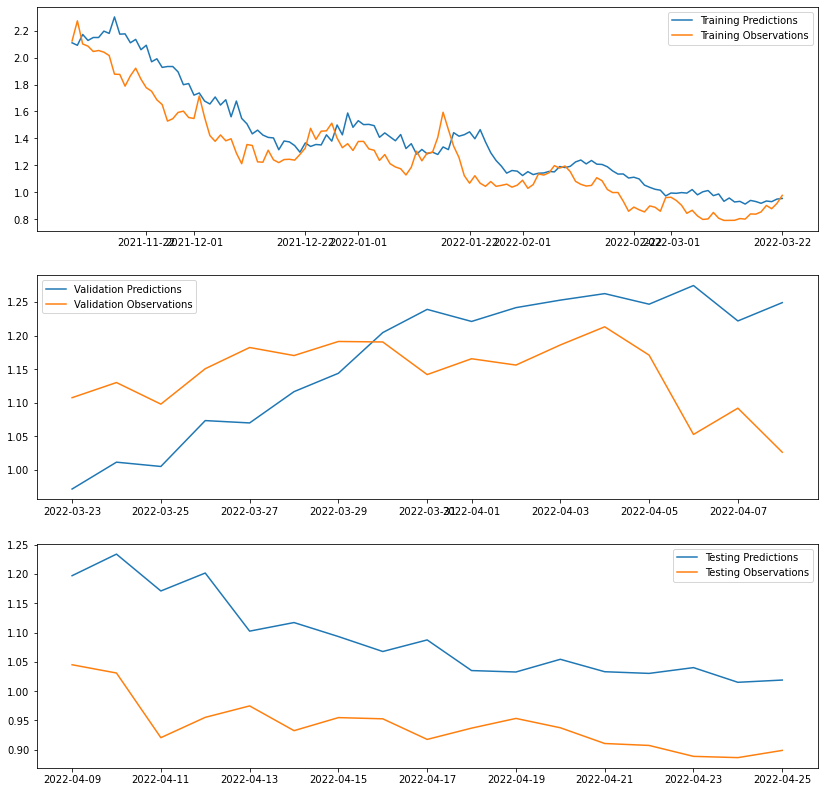

In [22]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## Recursive Predictions

In [23]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

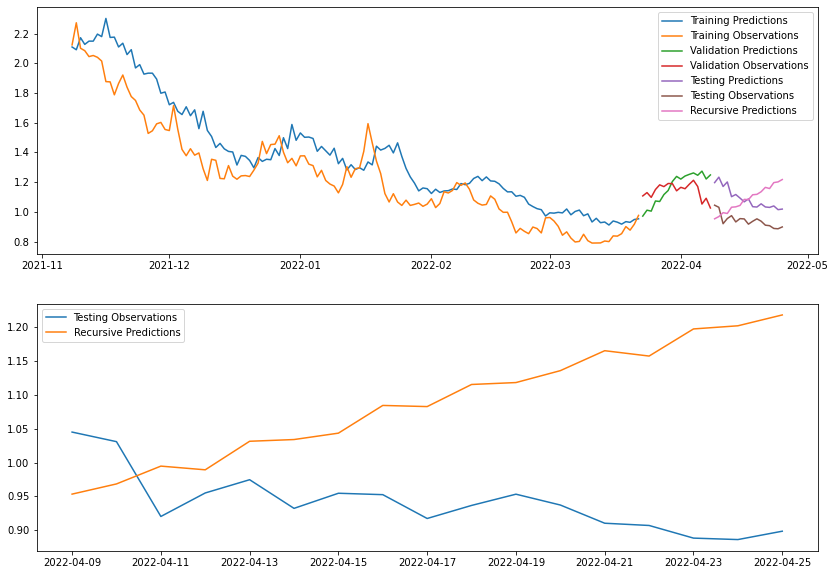

In [24]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

# ARIMA

In [25]:
df_complete

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07,21.505011,40.206349
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06,18.806006,26.074639
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06,1.990010,15.476554
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06,14.609836,23.730689
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06,5.595160,11.938711
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08,2.943303,8.087861
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08,0.350655,3.329853
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08,2.102638,2.933783
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08,0.217639,1.814127


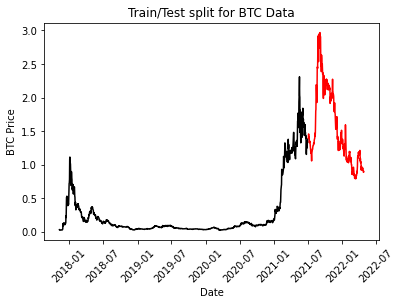

In [26]:
train = df_complete[df_complete['Date'] < "2021-07-01"][['Date','ADA-USD_CLOSE']]
test = df_complete[df_complete['Date'] > "2021-07-01"][['Date','ADA-USD_CLOSE']]

train = train.set_index('Date')
test = test.set_index('Date')

plt.plot(train['ADA-USD_CLOSE'], color = "black")
plt.plot(test['ADA-USD_CLOSE'], color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [27]:
# FUNCTION TO EVALUATE A GIVEN ARIMA MODEL AND RETURN THE MSE VALUE
def evaluate_model(train, test, order):
    
    y = train
    ARMAmodel = SARIMAX(y, order = order)#, seasonal_order=(2,2,2,12))
    ARMAmodel = ARMAmodel.fit()
    
    y_pred = ARMAmodel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"] 
    
    arma_mse = mean_squared_error(test["ADA-USD_CLOSE"].values, y_pred_df["Predictions"])
    
    return arma_mse


# ITERATE THROUGHOUT THE VARIOUS ARIMA PARAMETERS AND RETURN THE COMBINATION WITH THE LOWEST MSE SCORE
def search_parameters(dataset, p_values, d_values, q_values):
    
    train = df_complete[df_complete['Date'] < "2021-07-01"][['Date','ADA-USD_CLOSE']]
    test = df_complete[df_complete['Date'] > "2021-07-01"][['Date','ADA-USD_CLOSE']]

    train = train.set_index('Date')
    test = test.set_index('Date')

    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_model(train, test, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    
    
    
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
search_parameters(df_complete["ADA-USD_CLOSE"].values, p_values, d_values, q_values)
 

Best ARIMANone MSE=inf


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train
ARMAmodel = SARIMAX(y, order = (2, 0, 2))#, seasonal_order=(2,2,2,12))
ARMAmodel = ARMAmodel.fit()

C:\Users\rodri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\rodri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [29]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

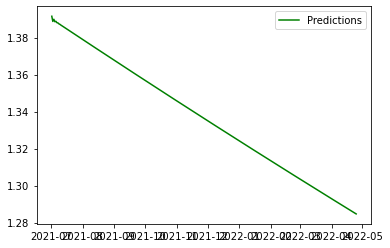

In [30]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

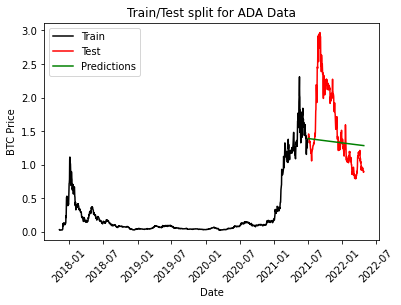

In [31]:
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for ADA Data")
plt.legend()
plt.show()